In [1]:
from Pinn import PINN
import torch

In [2]:
model = PINN([100,100,100,100])


\\home.mines.edu\home\m10936927\adit\My Documents\methane_project\intro_neural_operators\Net.py:10: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  torch.nn.init.xavier_uniform(m.weight)


In [ ]:
#each time step gets equal sampling
num_proj_samples = 1000
#drop off rate = 
keep = .9





In [ ]:
edge_width = 100
num_col_points = 400
num_ic_points = 100
num_epochs = 40000
optimizer = torch.optim.Adam(model.net.parameters(), lr=1e-3)
for epoch in range(num_epochs):
        
    optimizer.zero_grad()
    edge_width_t = edge_width * epoch / num_epochs
    collocation_points = torch.cat([torch.rand(num_col_points,1)*20,torch.rand(num_col_points,3)*edge_width_t-edge_width_t/2],dim=1)
    collocation_points = torch.cat([collocation_points, torch.cat([torch.rand(num_col_points,1)*20,torch.randn(num_col_points,3)],dim=1)])
    ic_col_pts = torch.cat([torch.zeros(num_ic_points,1),torch.rand(num_ic_points,3)*edge_width_t-edge_width_t/2],dim=1)
    wind_vector = torch.ones(collocation_points.shape[0],2)
    wind_vector[:,0] *= -4
    loss = model.compute_pde_loss(collocation_points,wind_vector)
    ic_loss = model.compute_data_loss(ic_col_pts, torch.zeros(num_ic_points,1))
    
    loss1 = (loss+ic_loss)
    loss1.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch',epoch, loss1,ic_loss)

epoch 0 tensor(0.6225, grad_fn=<AddBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)
epoch 100 tensor(0.0040, grad_fn=<AddBackward0>) tensor(1.2974e-05, grad_fn=<MeanBackward0>)
epoch 200 tensor(0.0023, grad_fn=<AddBackward0>) tensor(1.1065e-05, grad_fn=<MeanBackward0>)
epoch 300 tensor(0.0014, grad_fn=<AddBackward0>) tensor(1.4023e-05, grad_fn=<MeanBackward0>)
epoch 400 tensor(0.0010, grad_fn=<AddBackward0>) tensor(7.8242e-06, grad_fn=<MeanBackward0>)
epoch 500 tensor(0.0007, grad_fn=<AddBackward0>) tensor(7.8277e-06, grad_fn=<MeanBackward0>)
epoch 600 tensor(0.0004, grad_fn=<AddBackward0>) tensor(5.2294e-06, grad_fn=<MeanBackward0>)
epoch 700 tensor(0.0003, grad_fn=<AddBackward0>) tensor(7.0253e-06, grad_fn=<MeanBackward0>)
epoch 800 tensor(0.0003, grad_fn=<AddBackward0>) tensor(7.0885e-06, grad_fn=<MeanBackward0>)
epoch 900 tensor(0.0003, grad_fn=<AddBackward0>) tensor(1.4636e-05, grad_fn=<MeanBackward0>)
epoch 1000 tensor(0.0003, grad_fn=<AddBackward0>) tensor(6.8917e-06, grad_fn

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# torch.save(model,'best_mod.m')

In [ ]:
# model = torch.load('best_mod_ease.m')

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL Pinn.PINN was not an allowed global by default. Please use `torch.serialization.add_safe_globals([PINN])` or the `torch.serialization.safe_globals([PINN])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

C:\Users\m10936927\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


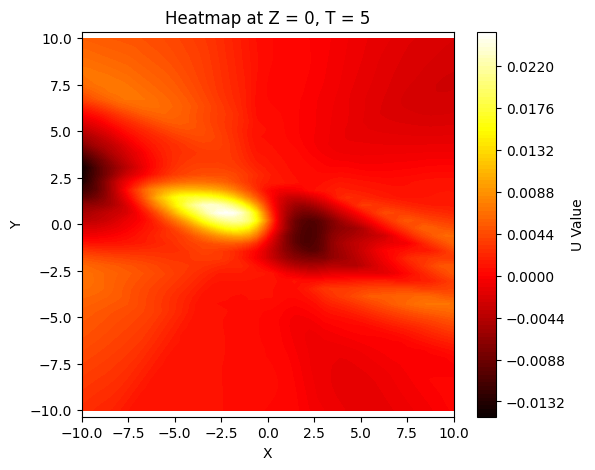

In [ ]:
res = 50
t = torch.linspace(0,20,21)
t = 5
x, y = torch.linspace(-10,10,res), torch.linspace(-10,10,res)
X,Y = torch.meshgrid(x,y)

# print(X== X.reshape(-1,1).reshape(21,21))
# X = X.reshape(-1,1)
# Y = Y.reshape(-1,1)
Z = torch.zeros(X.shape).reshape(-1,1)
T = torch.ones(X.shape).reshape(-1,1)*t

U = model.net(torch.cat([T,X.reshape(-1,1),Y.reshape(-1,1),Z],dim=1)).detach()
# print(T)

U_grid = U.reshape(res, res).numpy()
X_np = X.numpy()
Y_np = Y.numpy()

# Plot heatmap
plt.figure(figsize=(6, 5))
plt.contourf(X_np, Y_np, U_grid, levels=100, cmap='hot')
plt.colorbar(label='U Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Heatmap at Z = {0}, T = {t}')
plt.axis('equal')
plt.show()




